In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


1) Read and display the image in RGB format

In [3]:
image = cv2.imread('/content/marvels-spider-man.jpeg')  # Uploaded image
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB (OpenCV reads images in BGR)

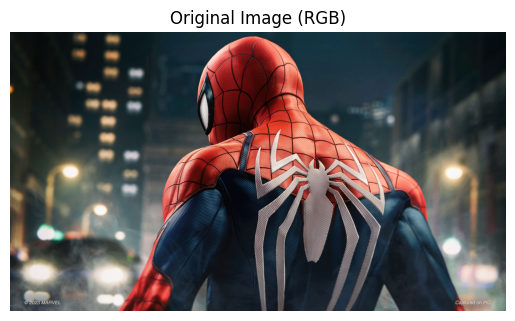

In [4]:
plt.imshow(rgb_image)
plt.title("Original Image (RGB)")
plt.axis('off')
plt.show()


2) Resize the image to (256,256) or (512,512) as per your choice

In [5]:
resized_image = cv2.resize(rgb_image, (256, 256))  # Resize to 256x256
resized_image1 = cv2.resize(rgb_image,  (512,512))  # Resize to 512x512

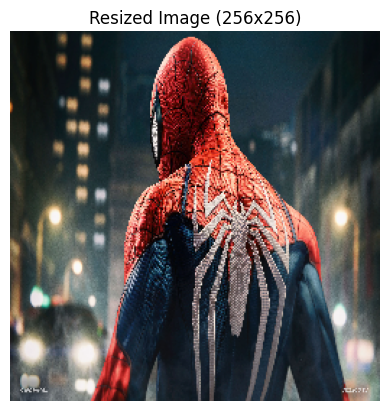

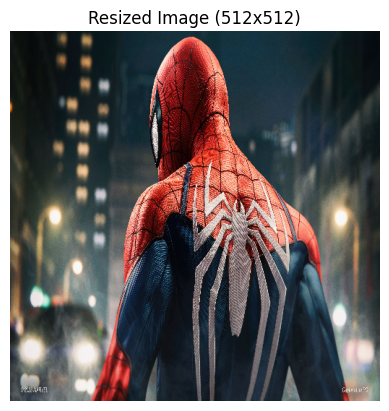

In [6]:
plt.imshow(resized_image)
plt.title("Resized Image (256x256)")
plt.axis('off')
plt.show()

plt.imshow(resized_image1)
plt.title("Resized Image (512x512)")
plt.axis('off')
plt.show()

3). Implement the following functions Without Using OpenCV (from scratch)

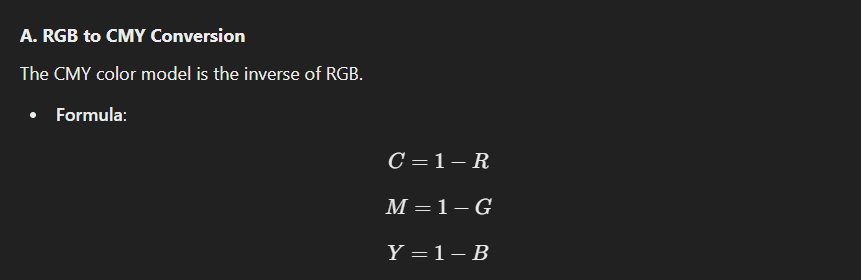

In [7]:
def rgb_to_cmy(rgb_image):
    # Normalize the RGB values to [0, 1]
    normalized_rgb = rgb_image / 255.0
    # Apply the formula for CMY conversion
    cmy_image = 1 - normalized_rgb
    return cmy_image


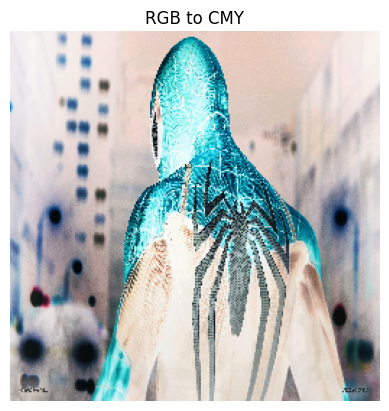

In [8]:
cmy_image = rgb_to_cmy(resized_image)
plt.imshow(cmy_image)
plt.title("RGB to CMY")
plt.axis('off')
plt.show()


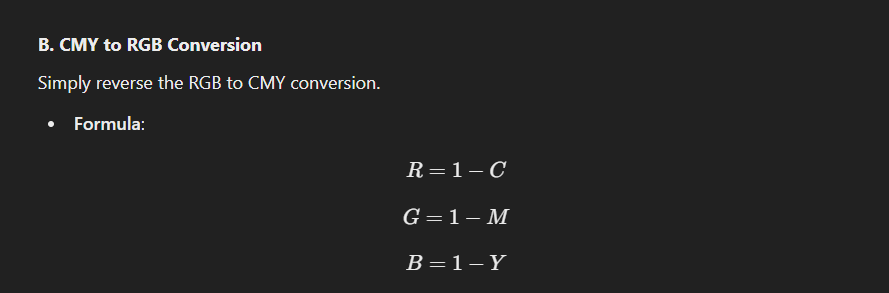

In [9]:
def cmy_to_rgb(cmy_image):
    rgb_image = 1 - cmy_image
    # Rescale back to [0, 255]
    return (rgb_image * 255).astype(np.uint8)


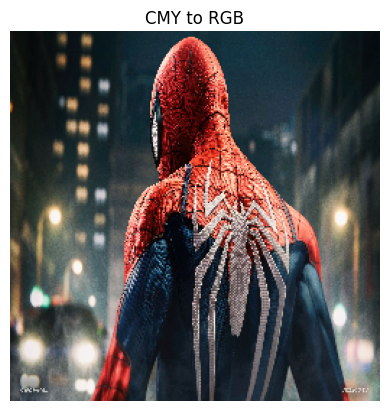

In [10]:
reconstructed_rgb = cmy_to_rgb(cmy_image)
plt.imshow(reconstructed_rgb)
plt.title("CMY to RGB")
plt.axis('off')
plt.show()


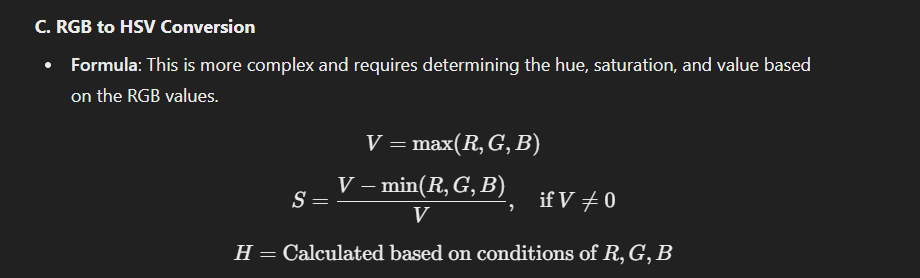

In [11]:
def rgb_to_hsv(rgb_image):
    hsv_image = np.zeros_like(rgb_image, dtype=np.float32)
    r, g, b = rgb_image[..., 0], rgb_image[..., 1], rgb_image[..., 2]

    max_rgb = np.max(rgb_image, axis=2)
    min_rgb = np.min(rgb_image, axis=2)
    delta = max_rgb - min_rgb

    # Hue Calculation
    hsv_image[..., 0] = np.where(max_rgb == r, (60 * ((g - b) / delta) % 360), hsv_image[..., 0])
    hsv_image[..., 0] = np.where(max_rgb == g, (60 * ((b - r) / delta) + 120), hsv_image[..., 0])
    hsv_image[..., 0] = np.where(max_rgb == b, (60 * ((r - g) / delta) + 240), hsv_image[..., 0])

    # Saturation Calculation
    hsv_image[..., 1] = np.where(max_rgb != 0, delta / max_rgb, 0)

    # Value Calculation
    hsv_image[..., 2] = max_rgb / 255.0

    return hsv_image


<ipython-input-11-c14993d277f5>:10: RuntimeWarning: invalid value encountered in divide
  hsv_image[..., 0] = np.where(max_rgb == r, (60 * ((g - b) / delta) % 360), hsv_image[..., 0])
<ipython-input-11-c14993d277f5>:11: RuntimeWarning: invalid value encountered in divide
  hsv_image[..., 0] = np.where(max_rgb == g, (60 * ((b - r) / delta) + 120), hsv_image[..., 0])
<ipython-input-11-c14993d277f5>:12: RuntimeWarning: invalid value encountered in divide
  hsv_image[..., 0] = np.where(max_rgb == b, (60 * ((r - g) / delta) + 240), hsv_image[..., 0])
<ipython-input-11-c14993d277f5>:15: RuntimeWarning: invalid value encountered in divide
  hsv_image[..., 1] = np.where(max_rgb != 0, delta / max_rgb, 0)
/usr/local/lib/python3.10/dist-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


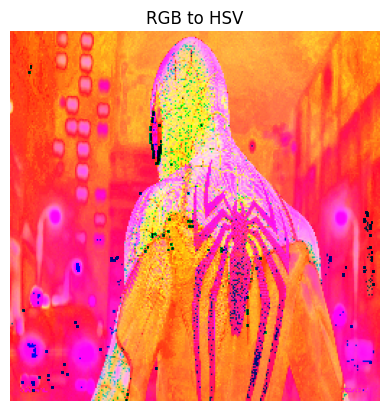

In [12]:
hsv_image = rgb_to_hsv(resized_image)
plt.imshow(hsv_image)
plt.title("RGB to HSV")
plt.axis('off')
plt.show()


D. HSV to RGB Conversion

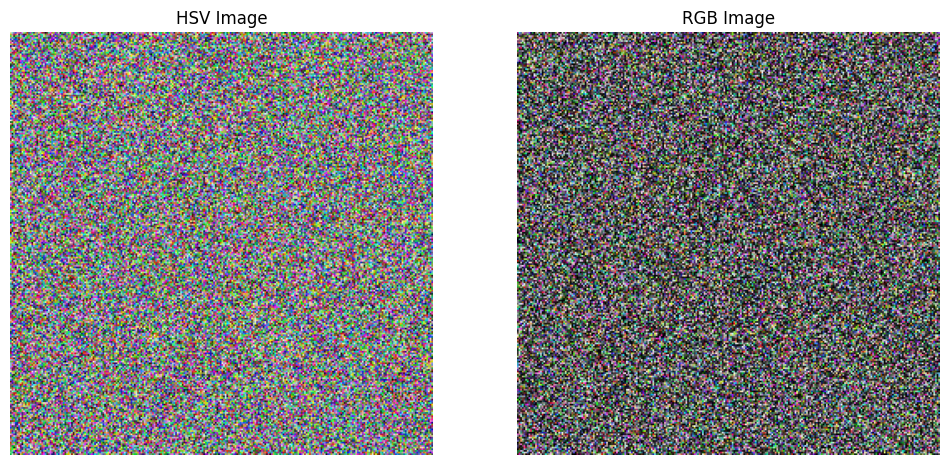

In [13]:
def hsv_to_rgb(hsv_image):
    # Split the HSV image into its H, S, and V components
    h, s, v = hsv_image[..., 0], hsv_image[..., 1], hsv_image[..., 2]

    # Normalize H to [0, 360] degrees and S, V to [0, 1]
    h = h * 360.0  # Assuming hue in the range [0, 1], we multiply by 360 to get degrees

    # Calculate chroma (C) and auxiliary variables
    c = v * s  # Chroma
    x = c * (1 - np.abs((h / 60) % 2 - 1))  # Intermediate value for RGB
    m = v - c  # Adjustment to match the value (V)

    # Initialize the RGB arrays
    rgb_image = np.zeros_like(hsv_image)

    # Assign RGB values based on the hue sector
    h_sector = (h // 60).astype(int)  # Each sector of the hue circle (0 to 5)

    # Sector 0: R = C, G = X, B = 0
    rgb_image[(h_sector == 0)] = np.stack((c, x, np.zeros_like(c)), axis=-1)[(h_sector == 0)]

    # Sector 1: R = X, G = C, B = 0
    rgb_image[(h_sector == 1)] = np.stack((x, c, np.zeros_like(c)), axis=-1)[(h_sector == 1)]

    # Sector 2: R = 0, G = C, B = X
    rgb_image[(h_sector == 2)] = np.stack((np.zeros_like(c), c, x), axis=-1)[(h_sector == 2)]

    # Sector 3: R = 0, G = X, B = C
    rgb_image[(h_sector == 3)] = np.stack((np.zeros_like(c), x, c), axis=-1)[(h_sector == 3)]

    # Sector 4: R = X, G = 0, B = C
    rgb_image[(h_sector == 4)] = np.stack((x, np.zeros_like(c), c), axis=-1)[(h_sector == 4)]

    # Sector 5: R = C, G = 0, B = X
    rgb_image[(h_sector == 5)] = np.stack((c, np.zeros_like(c), x), axis=-1)[(h_sector == 5)]

    # Add m to all the channels to match the brightness value (V)
    rgb_image += m[..., np.newaxis]

    # Scale the RGB image back to [0, 255] from [0, 1]
    rgb_image = (rgb_image * 255).astype(np.uint8)

    return rgb_image

# Example test for visualization
def display_images(hsv_image, rgb_image):
    # Display the HSV and RGB images side by side
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Convert HSV image for visualization
    ax[0].imshow(hsv_image)
    ax[0].set_title("HSV Image")
    ax[0].axis('off')

    # Display the RGB image
    ax[1].imshow(rgb_image)
    ax[1].set_title("RGB Image")
    ax[1].axis('off')

    # Show both images
    plt.show()

# Generate a random HSV image for testing
hsv_image = np.random.rand(256, 256, 3)  # HSV in range [0, 1]

# Convert HSV to RGB
rgb_image = hsv_to_rgb(hsv_image)

# Display both the HSV and RGB images
display_images(hsv_image, rgb_image)


E). RGB TO YIQ

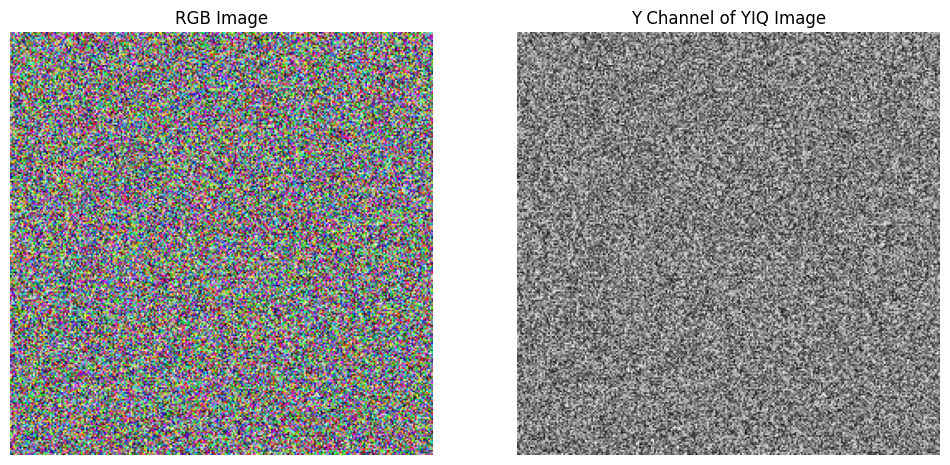

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def rgb_to_yiq(rgb_image):
    # Normalize the RGB values to [0, 1] by dividing by 255
    rgb_image = rgb_image / 255.0

    # Coefficients for the conversion
    rgb_to_yiq_matrix = np.array([[0.299,  0.587,  0.114],
                                  [0.596, -0.274, -0.322],
                                  [0.211, -0.523,  0.312]])

    # Perform the matrix multiplication for each pixel
    yiq_image = np.dot(rgb_image, rgb_to_yiq_matrix.T)

    return yiq_image

def display_images(rgb_image, yiq_image):
    # Display the RGB and YIQ images side by side
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Display the RGB image
    ax[0].imshow(rgb_image)
    ax[0].set_title("RGB Image")
    ax[0].axis('off')

    # Display the YIQ image - YIQ is not directly displayable so we visualize only the Y (luminance)
    ax[1].imshow(yiq_image[..., 0], cmap='gray')  # Show only Y channel as grayscale
    ax[1].set_title("Y Channel of YIQ Image")
    ax[1].axis('off')

    # Show both images
    plt.show()

# Example test
rgb_image = np.random.randint(0, 256, (256, 256, 3), dtype=np.uint8)  # Generate a random RGB image for testing

# Convert RGB to YIQ
yiq_image = rgb_to_yiq(rgb_image)

# Display both the RGB and YIQ (Y channel) images
display_images(rgb_image, yiq_image)


F). YIQ to RGB

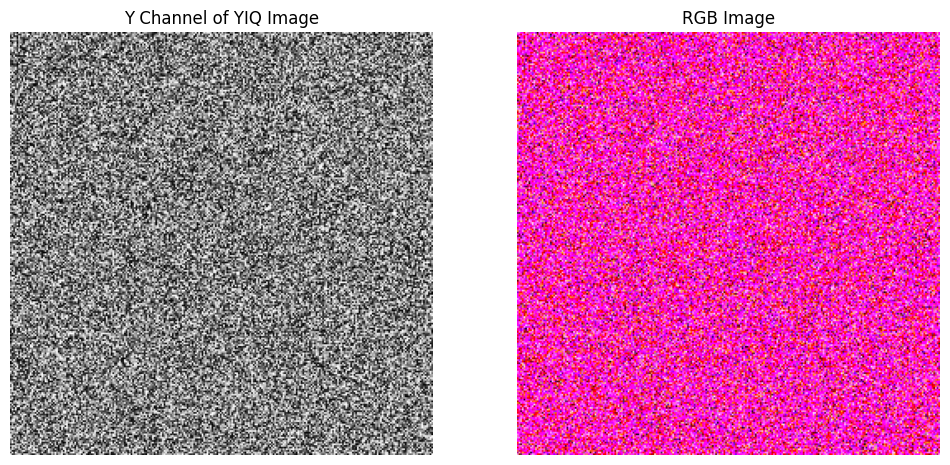

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def yiq_to_rgb(yiq_image):
    # Coefficients for the YIQ to RGB conversion
    yiq_to_rgb_matrix = np.array([[1.0,  0.956,  0.621],
                                  [1.0, -0.272, -0.647],
                                  [1.0, -1.106,  1.703]])

    # Perform the matrix multiplication for each pixel
    rgb_image = np.dot(yiq_image, yiq_to_rgb_matrix.T)

    # Clip the values to be in the valid range [0, 1]
    rgb_image = np.clip(rgb_image, 0, 1)

    # Scale the RGB image back to [0, 255] from [0, 1]
    rgb_image = (rgb_image * 255).astype(np.uint8)

    return rgb_image

def display_images(yiq_image, rgb_image):
    # Display the YIQ (Y channel) and RGB images side by side
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Display the YIQ image - Only the Y channel (luminance) is visually meaningful
    ax[0].imshow(yiq_image[..., 0], cmap='gray')  # Y channel as grayscale
    ax[0].set_title("Y Channel of YIQ Image")
    ax[0].axis('off')

    # Display the RGB image
    ax[1].imshow(rgb_image)
    ax[1].set_title("RGB Image")
    ax[1].axis('off')

    # Show both images
    plt.show()

# Example test
yiq_image = np.random.rand(256, 256, 3)  # Generate a random YIQ image for testing

# Convert YIQ to RGB
rgb_image = yiq_to_rgb(yiq_image)

# Display both the YIQ (Y channel) and RGB images
display_images(yiq_image, rgb_image)


G). RGB to YUV

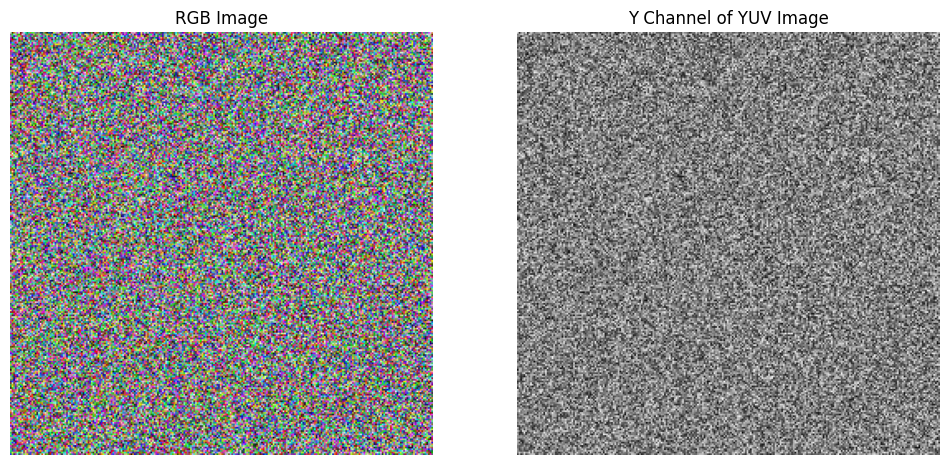

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def rgb_to_yuv(rgb_image):
    # Normalize the RGB values to [0, 1] by dividing by 255
    rgb_image = rgb_image / 255.0

    # Coefficients for the conversion
    rgb_to_yuv_matrix = np.array([[ 0.299,    0.587,    0.114  ],
                                  [-0.14713, -0.28886,  0.436  ],
                                  [ 0.615,   -0.51499, -0.10001]])

    # Perform the matrix multiplication for each pixel
    yuv_image = np.dot(rgb_image, rgb_to_yuv_matrix.T)

    return yuv_image

def display_images(rgb_image, yuv_image):
    # Display the RGB and YUV (Y channel) images side by side
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Display the RGB image
    ax[0].imshow(rgb_image)
    ax[0].set_title("RGB Image")
    ax[0].axis('off')

    # Display the Y channel (luminance) of YUV image
    ax[1].imshow(yuv_image[..., 0], cmap='gray')  # Y channel in grayscale
    ax[1].set_title("Y Channel of YUV Image")
    ax[1].axis('off')

    # Show both images
    plt.show()

# Example test
rgb_image = np.random.randint(0, 256, (256, 256, 3), dtype=np.uint8)  # Generate a random RGB image for testing

# Convert RGB to YUV
yuv_image = rgb_to_yuv(rgb_image)

# Display both the RGB and YUV (Y channel) images
display_images(rgb_image, yuv_image)


H). YUV to RGB

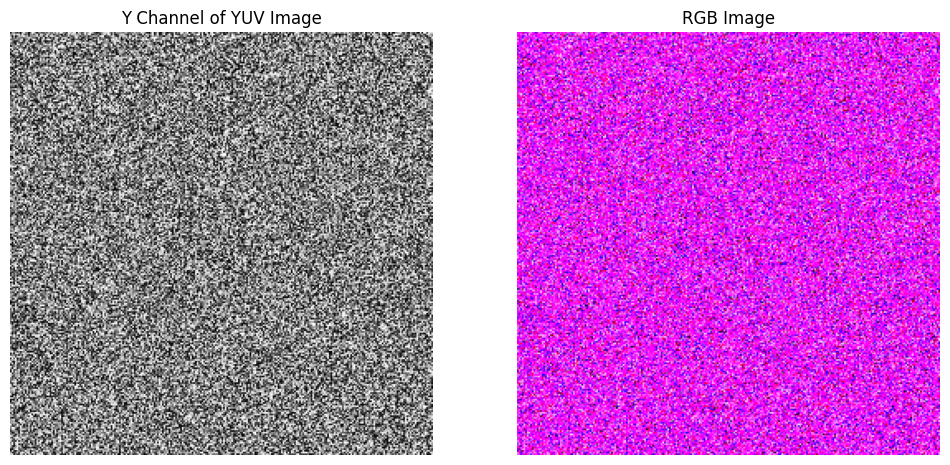

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def yuv_to_rgb(yuv_image):
    # Coefficients for the conversion
    yuv_to_rgb_matrix = np.array([[ 1.0,  0.0,      1.13983],
                                  [ 1.0, -0.39465, -0.58060],
                                  [ 1.0,  2.03211,  0.0]])

    # Perform the matrix multiplication for each pixel
    rgb_image = np.dot(yuv_image, yuv_to_rgb_matrix.T)

    # Clip the values to be in the valid range [0, 1]
    rgb_image = np.clip(rgb_image, 0, 1)

    # Scale the RGB image back to [0, 255] from [0, 1]
    rgb_image = (rgb_image * 255).astype(np.uint8)

    return rgb_image

def display_images(yuv_image, rgb_image):
    # Display the YUV (Y channel) and RGB images side by side
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Display the YUV image - Only the Y channel (luminance) is visually meaningful
    ax[0].imshow(yuv_image[..., 0], cmap='gray')  # Y channel in grayscale
    ax[0].set_title("Y Channel of YUV Image")
    ax[0].axis('off')

    # Display the RGB image
    ax[1].imshow(rgb_image)
    ax[1].set_title("RGB Image")
    ax[1].axis('off')

    # Show both images
    plt.show()

# Example test
yuv_image = np.random.rand(256, 256, 3)  # Generate a random YUV image for testing

# Convert YUV to RGB
rgb_image = yuv_to_rgb(yuv_image)

# Display both the YUV (Y channel) and RGB images
display_images(yuv_image, rgb_image)
